In [53]:
import numpy as np
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import csv
from numpy import genfromtxt

# A) K-Moyennes :

In [54]:
def kMeans(X , Cluster, itera):
    np.random.shuffle(X)
    centre = X[0:Cluster, 0:np.size(X,1)]
    for i in range(0, itera):
        dist = metrics.pairwise.euclidean_distances (X,centre)
        Etiq = np.argmin(dist, axis=1)
        centre = np.nan_to_num(centre)
        for j in range(0, Cluster):
            centre[j,:] =  np.mean(X[(Etiq==j)] ,axis=0)
    return centre, Etiq

In [57]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

c, E = kMeans(X,2,10000)

In [58]:
Kfit = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(X)
centre = np.array(Kfit.cluster_centers_)
print ('Centroide de kmeans ', centre)
print ('Centroide propre ', c)


score=0
NClusters=0

Centroide de kmeans  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Centroide propre  [[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]


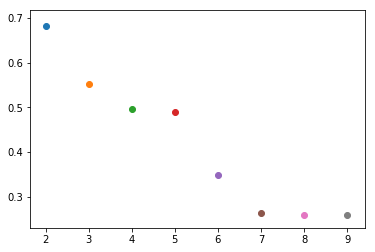

In [50]:
for i in range(2, 10):
    c , E = kMeans(X,i,10)
    scoreN = silhouette_score (X, E, metric='euclidean')
    plt.scatter(i,scoreN)
    if scoreN > score:
        score=scoreN
        NClusters=i

In [51]:
print('Le mellieur scores est:',score)

Le mellieur scores est: 0.6810461692117461


In [52]:
print('Le mellieur nombre de clusters est',NClusters)
 

Le mellieur nombre de clusters est 2


Text(0.5, 1.0, 'CLF')

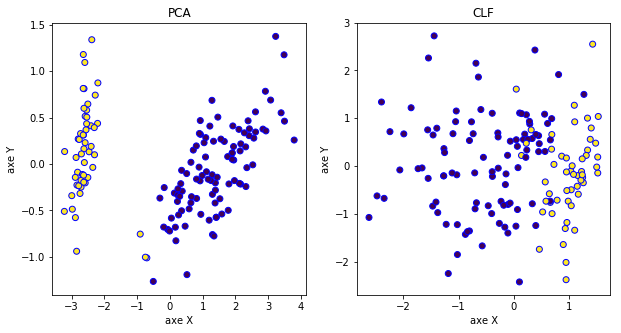

In [8]:
c, E = kMeans(X,2,1000)   
    
pca = PCA(n_components=2)

IrisPca = pca.fit(X)
IrisPca =pca.transform(X)

clf = LinearDiscriminantAnalysis()
IrisClf = clf.fit(X, Y) 
IrisClf = clf.transform(X)


fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(IrisPca[:,0],IrisPca[:,1], c=E , edgecolors='b')

plt.xlabel('axe X')
plt.ylabel('axe Y')
plt.title('PCA')

ax1 = fig.add_subplot(1,2,2)
ax1.scatter(IrisClf[:,0],IrisClf[:,1], c=E , edgecolors='b')

plt.xlabel('axe X')
plt.ylabel('axe Y')
plt.title('CLF')

 2 differences entre PCA et ADL
1-ADL est supervisée pendant PCA ne l'est pas
2-PCA comme une technique qui trouve les directions de la variance maximale
par contre LDA tente de trouver un sous-espace de fonction optimisant la 
séparabilité des classes (notez que LD 2 serait un très mauvais discriminant
 linéaire dans la figure ci-dessus).
    

# B) Analyse des données « choix projet »

In [59]:

with open('choixprojets.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    # get header from first row
    headers = next(reader)
    # get all the rows as a list
    data = list(reader)
    # transform data into numpy array
    data = np.array(data)
    
    print(data[:,0])

etudiantes = data[:,0]
calification = data[:,1:3]

print(calification)

#my_data = genfromtxt('choixprojets.csv', delimiter=';')
#print(my_data)
#type(spamreader)

    

['bl/.vSDYCGrSs' 'bl/.vSDYCGrSs' 'bl/.vSDYCGrSs' ... 'blzon470EHguA'
 'blzon470EHguA' 'blzon470EHguA']
[['gaJy31VwBA4IY' 'bien']
 ['gae.ZZuu4G/9c' 'bien']
 ['ga5JTmKLpYzns' 'bien']
 ...
 ['gaC6WQ.f7kKQc' 'trÃ¨sbien']
 ['gagPvY7s.SWm6' 'trÃ¨sbien']
 ['gaw2dFU/DFhQo' 'trÃ¨sbien']]


In [64]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn import *
import scipy.stats as st
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

# telecharger donnees
C = pd.read_csv("choixprojets.csv" , sep=';') 
M = pd.read_csv("choixprojetstab.csv" , sep=';') 


MT= M.drop(['étudiant·e'], axis=1)

MT= MT.to_numpy()


In [65]:
#g>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><raph silouhette kmeans<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2537954711744975
For n_clusters = 3 The average silhouette_score is : 0.27395879223997877
For n_clusters = 4 The average silhouette_score is : 0.26800412978792404
For n_clusters = 5 The average silhouette_score is : 0.3176827275171515
For n_clusters = 6 The average silhouette_score is : 0.336781722416005
For n_clusters = 8 The average silhouette_score is : 0.15424381273225066


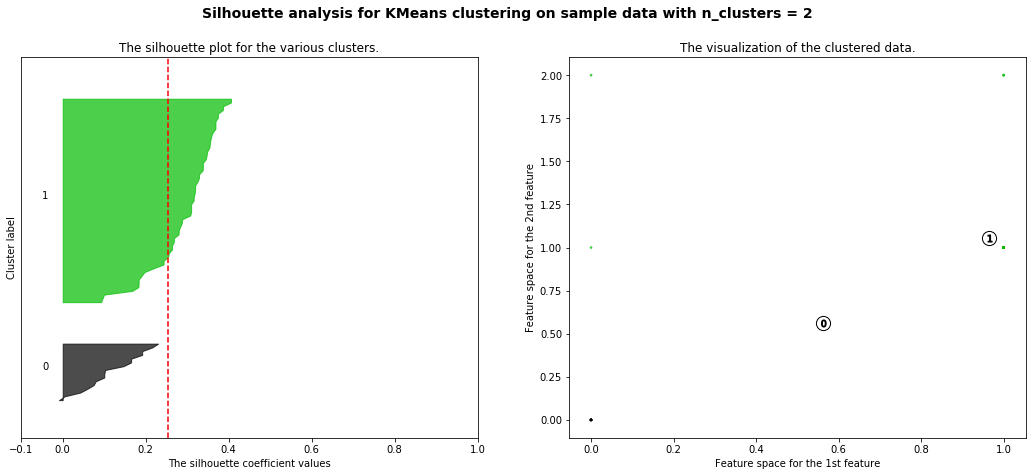

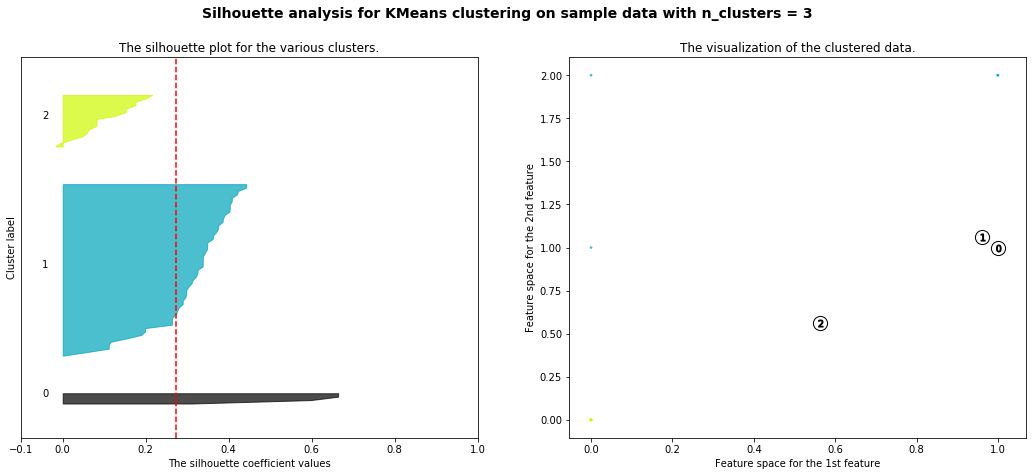

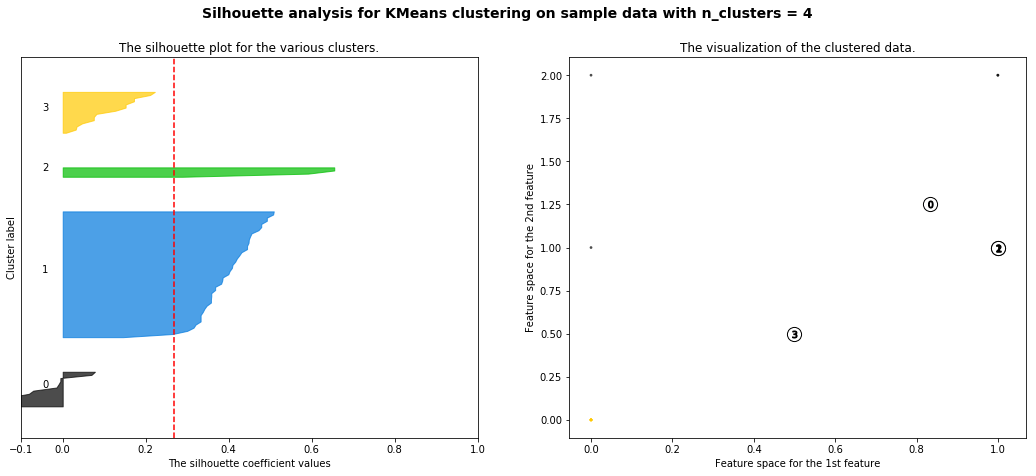

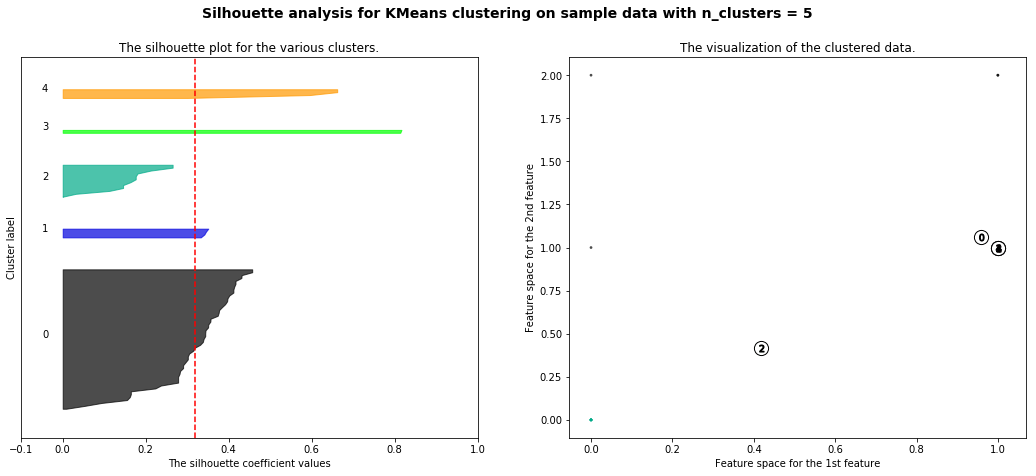

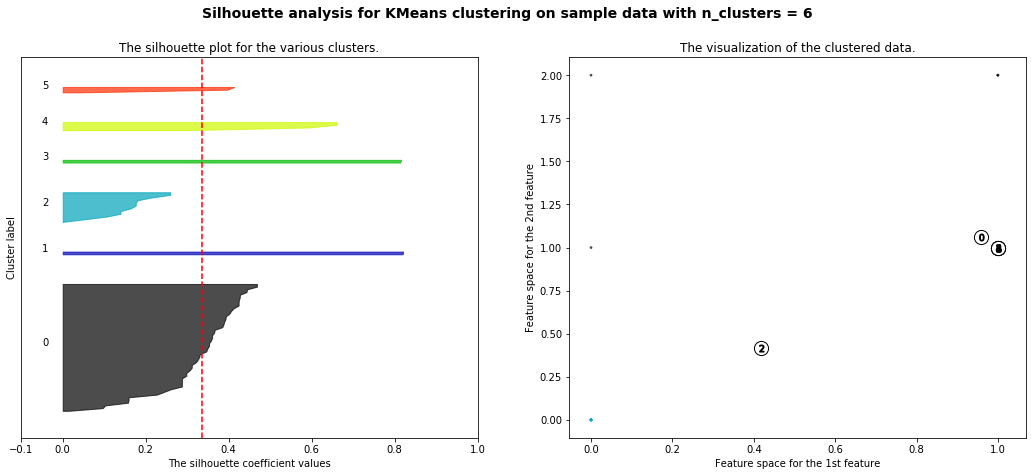

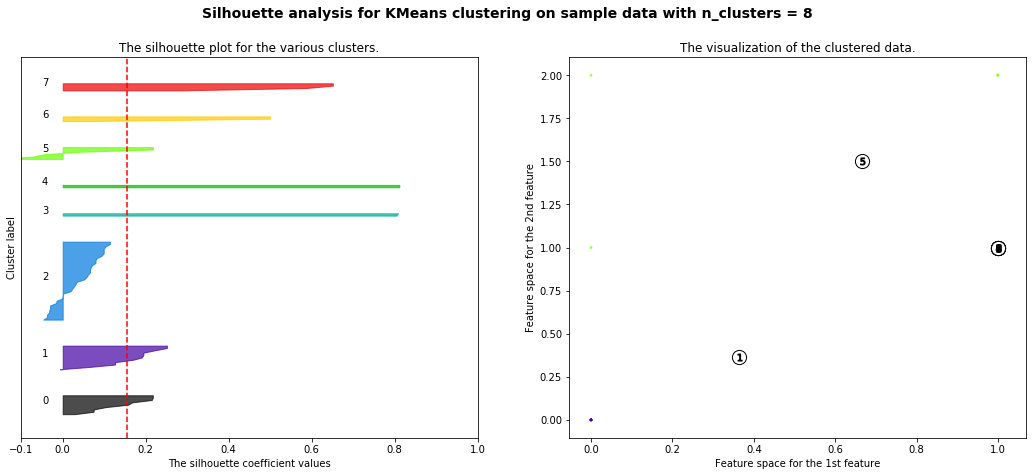

In [66]:
print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(MT) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(MT)
        # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(MT, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(MT, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(MT[:, 0], MT[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.25270656690459653
For n_clusters = 3 The average silhouette_score is : 0.25719312860651694
For n_clusters = 4 The average silhouette_score is : 0.2884593801353125
For n_clusters = 5 The average silhouette_score is : 0.302588527642423
For n_clusters = 6 The average silhouette_score is : 0.3253001235762009
For n_clusters = 8 The average silhouette_score is : 0.3556259484267863


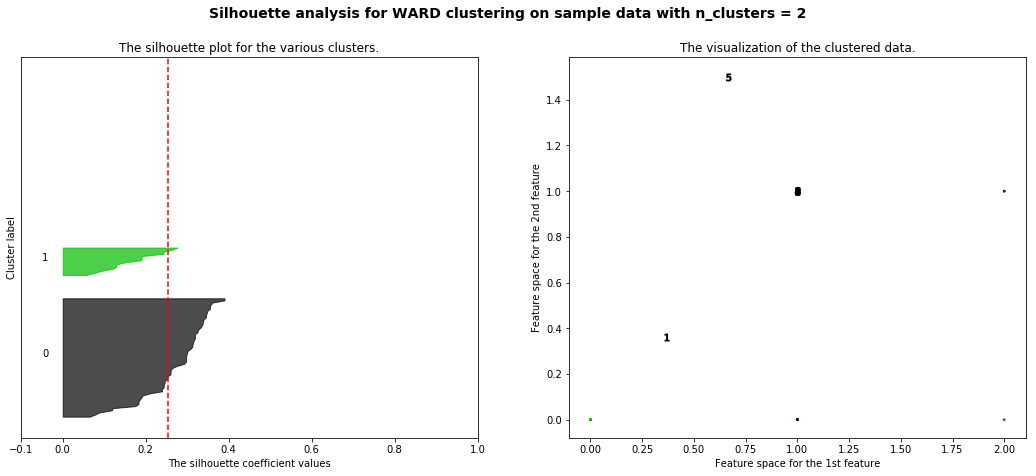

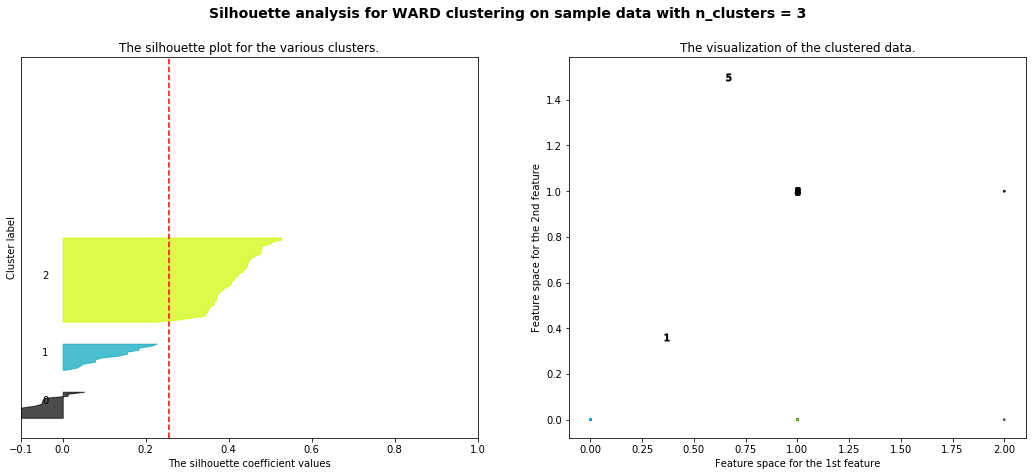

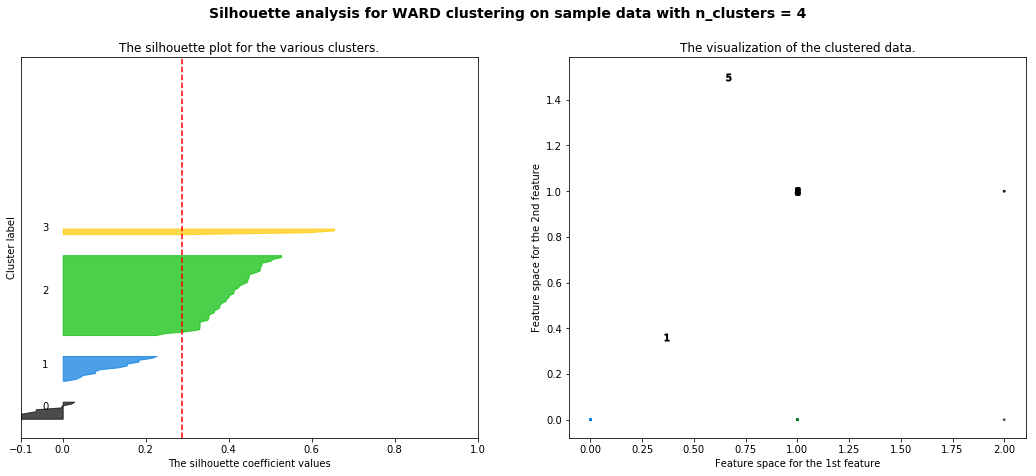

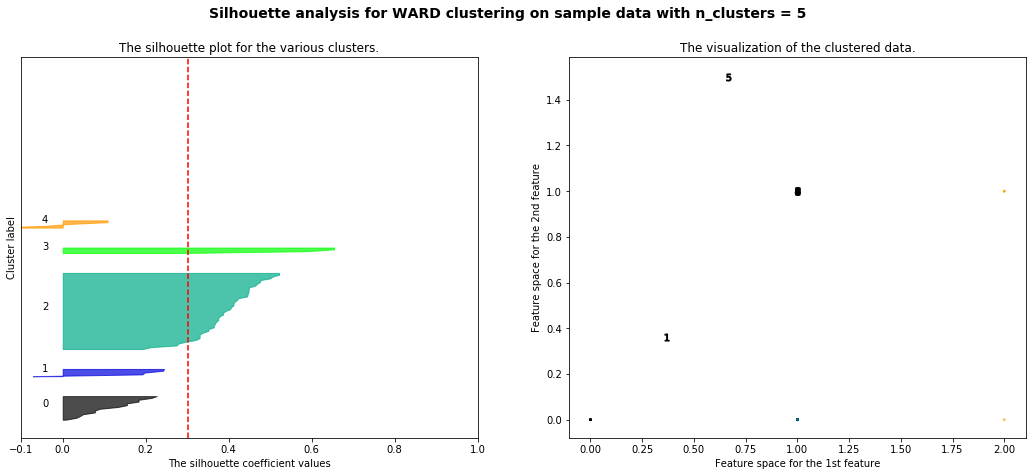

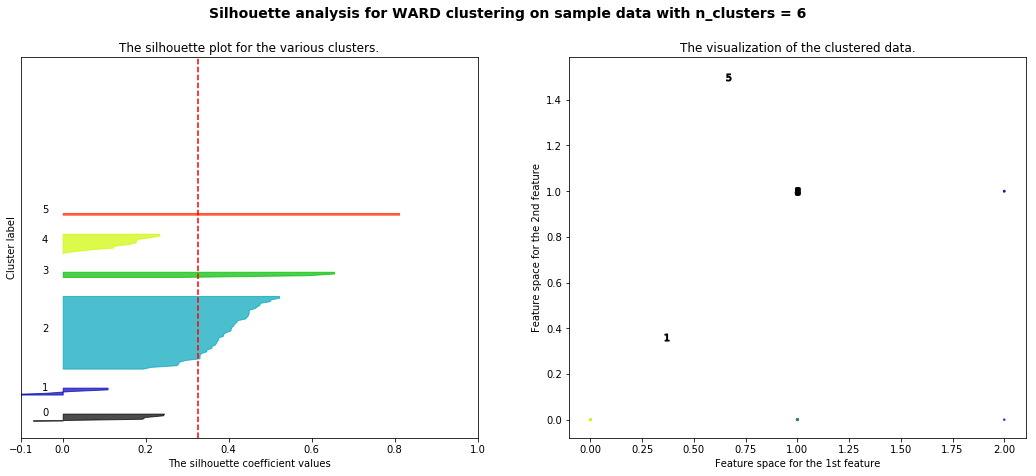

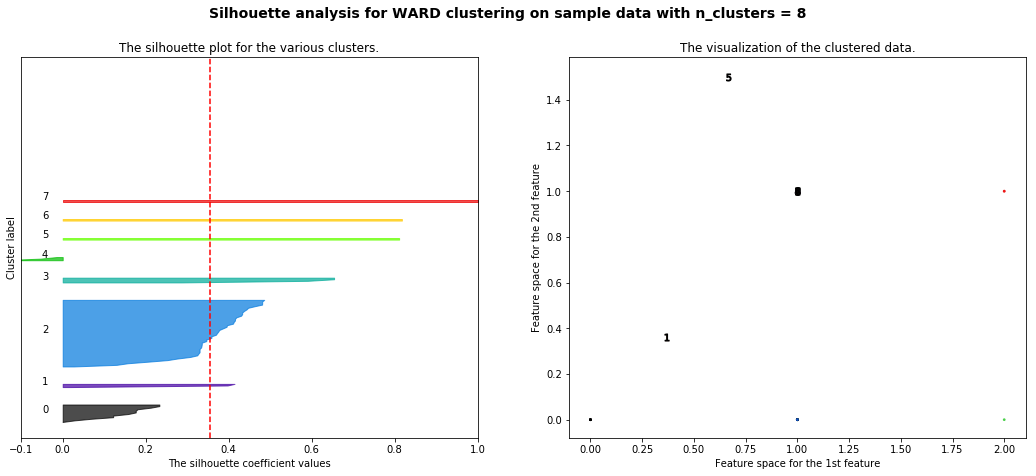

In [67]:
#g>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><raph silouhette WARD<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

from sklearn.cluster import AgglomerativeClustering


#ward = AgglomerativeClustering(n_clusters=8, linkage='ward').fit(MT)

#label = ward.labels_
#rint(label)

#silhouette_avg = silhouette_score(MT, label)
#print(silhouette_avg)

print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer =  AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(MT)
    cluster_labels = clusterer.labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(MT, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(MT, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(MT[:, 1], MT[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
           #     c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for WARD clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
    

Selon Kmeans de scikitlearn le meilleur nombre de clusteres est 5


Selon AgglomerativeClustering de scikitlearn le meilleur nombre de clusteres est 6